<a href="https://colab.research.google.com/github/enliven25/Stage-B-/blob/main/Stage_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 147d54914d81f000

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [61]:
path = "/content/drive/MyDrive/energydata_complete.csv"

In [62]:
df = pd.read_csv(path)
print(energy_data)

                      date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0      2016-01-11 17:00:00          60      30  ...   5.300000  13.275433  13.275433
1      2016-01-11 17:10:00          60      30  ...   5.200000  18.606195  18.606195
2      2016-01-11 17:20:00          50      30  ...   5.100000  28.642668  28.642668
3      2016-01-11 17:30:00          50      40  ...   5.000000  45.410389  45.410389
4      2016-01-11 17:40:00          60      40  ...   4.900000  10.084097  10.084097
...                    ...         ...     ...  ...        ...        ...        ...
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  3

In [63]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#Data Visualization

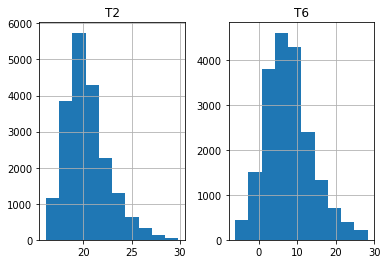

In [64]:
cdf = df[['T2','T6']]
viz = cdf[['T2','T6']]
viz.hist()
plt.show()

In [65]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

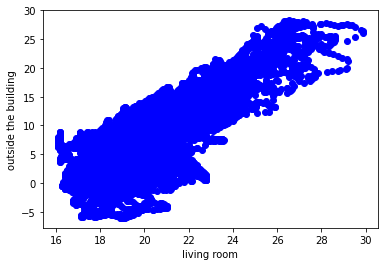

In [66]:
plt.scatter(train.T2, train.T6,  color='blue')
plt.xlabel("living room")
plt.ylabel("outside the building")
plt.show()

#Linear Regression

In [67]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['T2']])
train_y = np.asanyarray(train[['T6']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.22988508]]
Intercept:  [-37.44077534]


In [68]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['T2']])
test_y = np.asanyarray(test[['T6']])
test_y_ = regr.predict(test_x)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: 0.64


In [69]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#Drop Columns

In [70]:
df = df.drop(['date', 'lights'], axis = 1) 

df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#MinMaxScaler Normalization

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

energydata_scaled = pd.DataFrame(scaler.fit_transform(df),  columns = df.columns)



#Split dataset into feature and target

In [72]:
X = energydata_scaled.drop(columns=['Appliances'])

y = energydata_scaled['Appliances']

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (13814, 26)
y_train shape: (13814,)
X_test shape: (5921, 26)
y_test shape: (5921,)


In [44]:
reg_df = energydata_scaled[['T2', 'T6']]

reg_df.head()


,T2,T6
0,0.225345,0.381070
1,0.225345,0.375443
2,0.225345,0.367487
3,0.225345,0.363800
4,0.225345,0.361859


In [45]:
x= reg_df['T2'].values.reshape(-1,1)
y = reg_df['T6'].values.reshape(-1,1)

Split our dataset into the training and testing dataset with a ratio of 70:30 respectively

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

#Training Model

In [48]:
#linear model
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()

# Train the model using the training sets
lin_regr.fit(xtrain, ytrain)

# Make predictions using the testing set
pred = lin_regr.predict(xtest)

In [49]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
energy_pred = regr.predict(X_test)

print("Training set score: {:.3f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(regr.score(X_test, y_test)))

Training set score: 0.145
Test set score: 0.149


In [50]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, energy_pred)

print('MAE:',(round(mae, 2)))

#rss
import numpy as np
rss = np.sum(np.square(y_test - energy_pred))
print('RSS:',(round(rss, 2)))

#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, energy_pred))
print('RMSE:',(round(rmse, 3)))

#R-squared or coefficient of determination
from sklearn.metrics import r2_score

r2_score = r2_score(y_test, energy_pred)
print('R-squared:',(round(r2_score, 2)))

MAE: 0.05
RSS: 45.35
RMSE: 0.088
R-squared: 0.15


In [51]:
def get_weights_df(model, feat, col_name):
    
  #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    
    return weights_df

In [52]:
linear_model_weights = get_weights_df(regr, X_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


#Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

#obtain predictions
ridge_pred = ridge_reg.predict(X_test)

print("Training set score: {:.3f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(ridge_reg.score(X_test, y_test)))

Training set score: 0.145
Test set score: 0.149


In [54]:
#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('RMSE:',(round(rmse, 3)))

RMSE: 0.088


No change in RMSE as linear model RMSE is also 0.088

#Lasso Regression 

In [55]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

#obtain predictions
lasso_pred = lasso_reg.predict(X_test)

print("Training set score: {:.3f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lasso_reg.score(X_test, y_test)))

Training set score: 0.025
Test set score: 0.027


In [56]:
#Lasso regression weights
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


4 non-zero weights i.e. RH_out, RH_8, Windspeed and RH_1

In [57]:
#root mean squared error
from sklearn.metrics import  mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('RMSE:',(round(rmse, 3)))

RMSE: 0.094
